In [1]:
import numpy as np

fruits = np.load('data/fruits_300.npy')

In [2]:
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
pca.components_.shape

(50, 10000)

In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)


    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')

    plt.show()

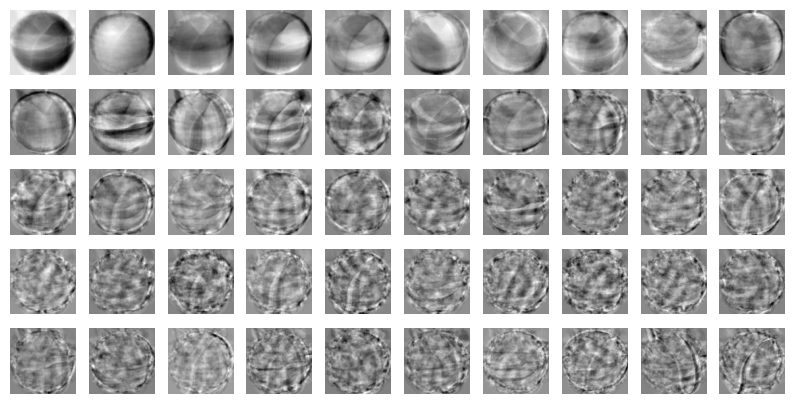

In [8]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [11]:
fruits_2d.shape

(300, 10000)

In [10]:
#압축
fruits_pcs = pca.transform(fruits_2d)
fruits_pcs.shape

(300, 50)

In [14]:
# 재확장
fruits_inverse = pca.inverse_transform(fruits_pcs)
fruits_inverse.shape

(300, 10000)

In [15]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

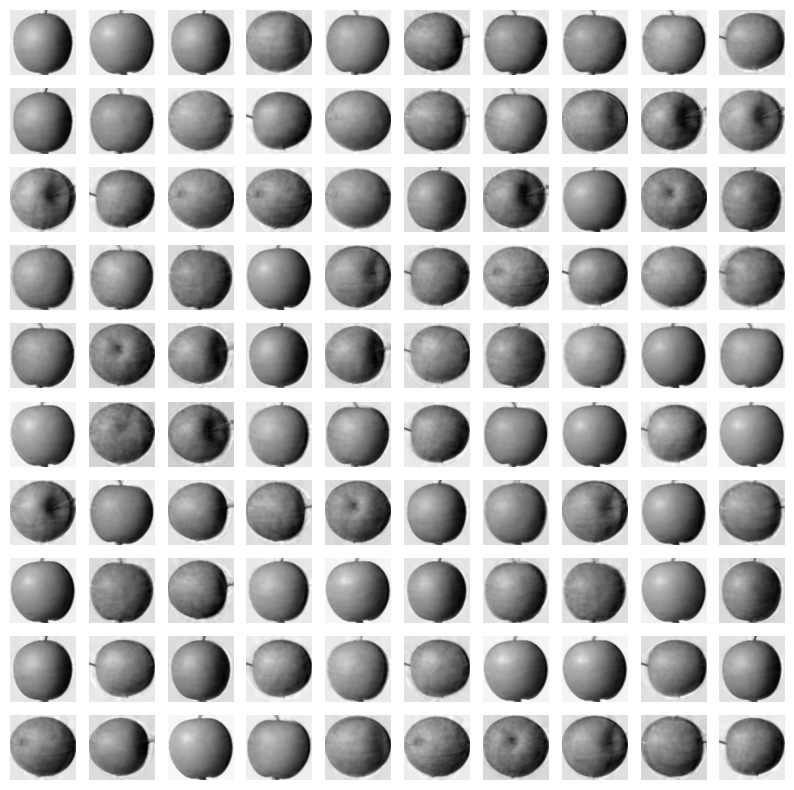

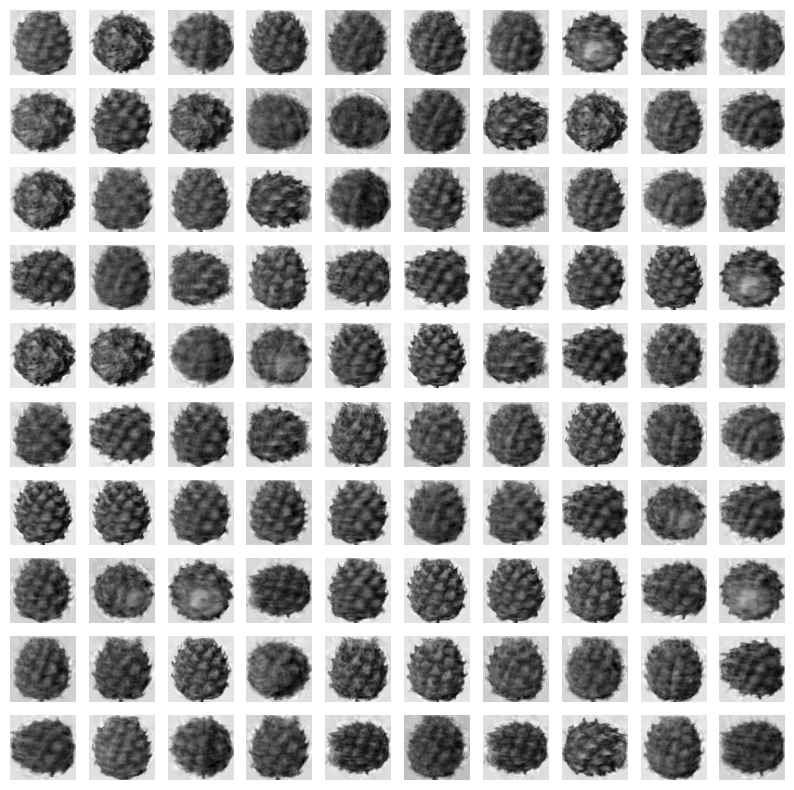

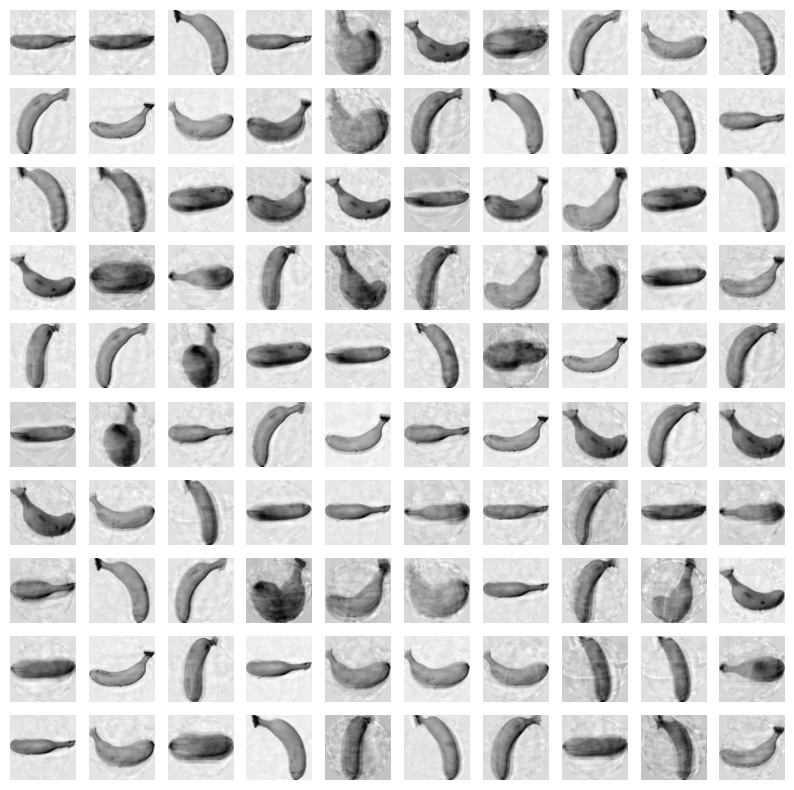

In [16]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [18]:
# 50개의 data
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511202, 0.00486382, 0.00480345,
       0.00447838, 0.00437316, 0.00408041, 0.00389471, 0.00372444,
       0.00359281, 0.00331464, 0.00317809, 0.00304261, 0.0030377 ,
       0.00288876, 0.00275834, 0.00264819, 0.00255797, 0.00252094,
       0.00247196, 0.00239457, 0.00230999, 0.00222168, 0.0021679 ,
       0.00213362, 0.00195835, 0.00192387, 0.00190102, 0.00184535,
       0.00181335, 0.00172518, 0.00167319, 0.0016149 , 0.00156325])

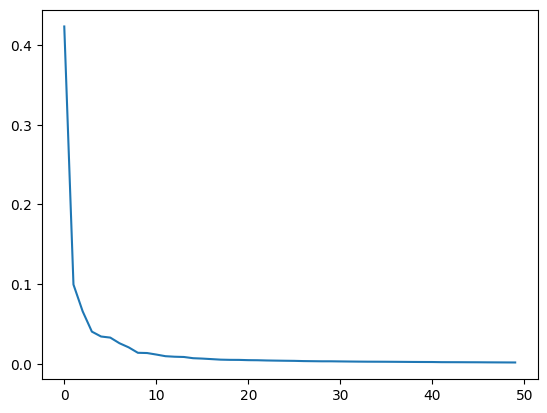

In [19]:
plt.plot(pca.explained_variance_ratio_)

In [20]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()

In [23]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [24]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
scores

{'fit_time': array([8.70863986, 7.89847398, 8.49936581, 8.32180619, 8.7319212 ]),
 'score_time': array([0.00509596, 0.01639032, 0.02854109, 0.02330208, 0.03527188]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [31]:
scores = cross_validate(lr, fruits_pca, target)
scores

/Users/kimminsu/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kimminsu/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

{'fit_time': array([0.03102684, 0.01047611, 0.01170397, 0.00358772, 0.01057792]),
 'score_time': array([0.00064492, 0.00046611, 0.00026202, 0.00016999, 0.00025797]),
 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}

In [27]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [29]:
# 10000개의 픽셀 중에서 2개의 주성분을 찾음
pca.n_components_

np.int64(2)

In [30]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [32]:
scores = cross_validate(lr, fruits_pca, target)
scores

/Users/kimminsu/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kimminsu/Desktop/DMF/ML/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

{'fit_time': array([0.02009988, 0.00866508, 0.01137996, 0.00522685, 0.00978518]),
 'score_time': array([0.00078988, 0.00035191, 0.00033832, 0.00025916, 0.00022697]),
 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}

In [34]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 99, 110,  91]))

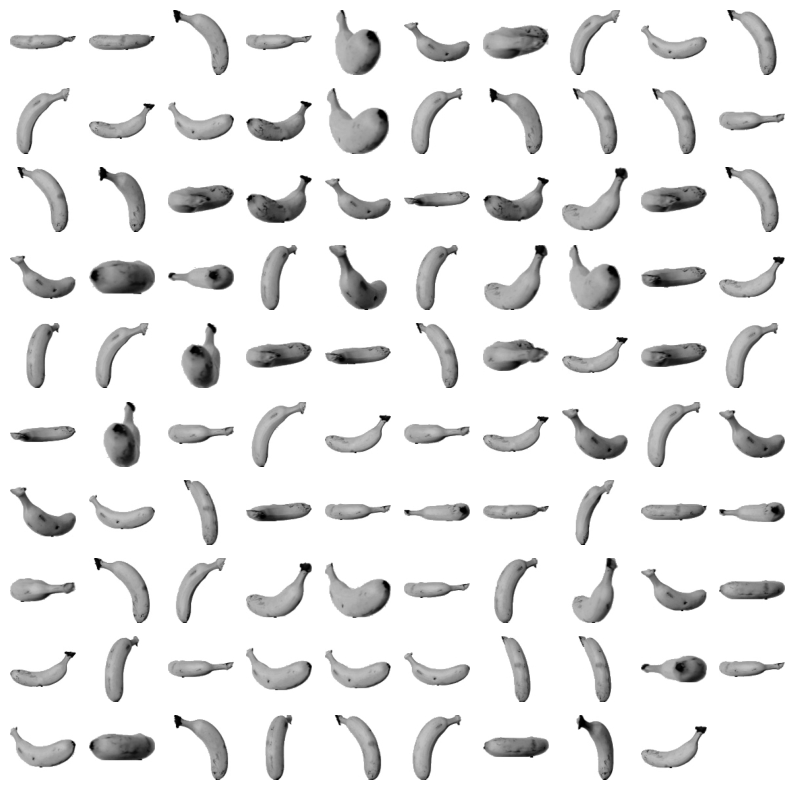

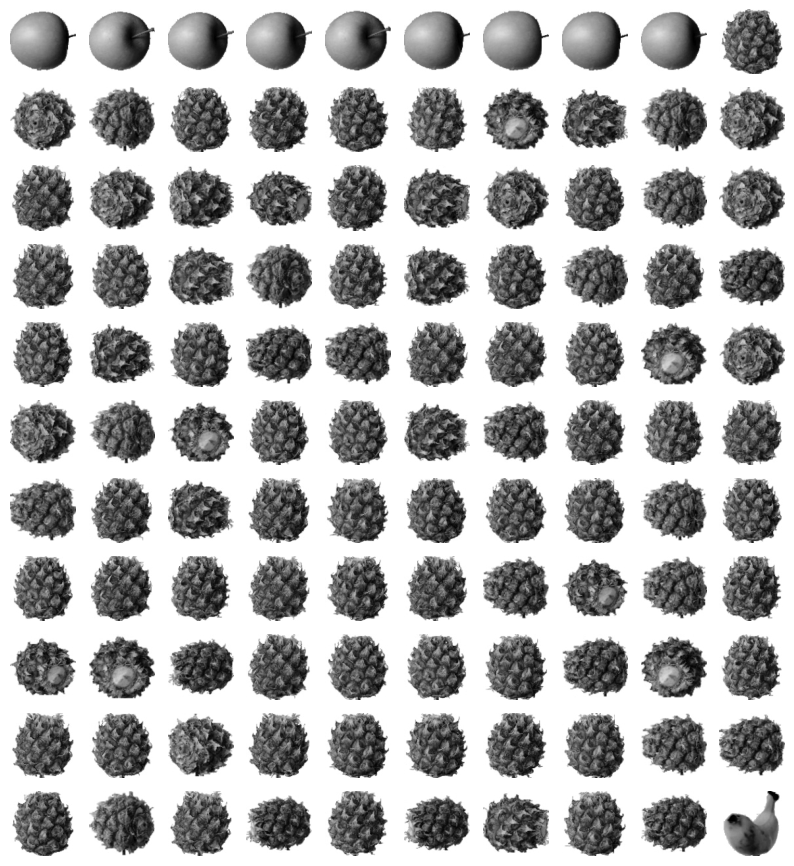

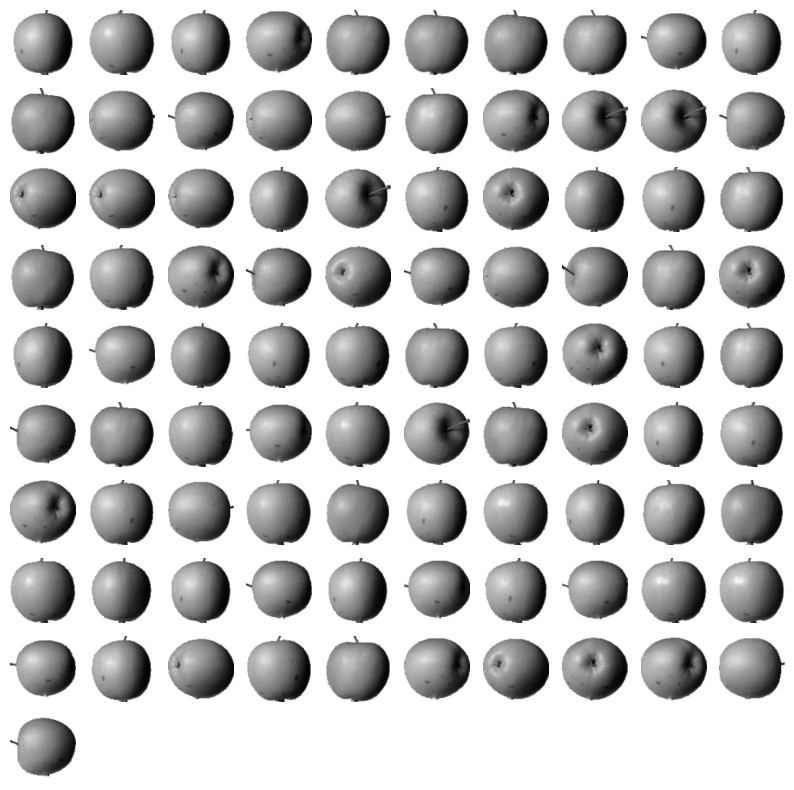

In [38]:
for lable in range(0, 3):
    draw_fruits(fruits[km.labels_ == lable])
    print('\n')

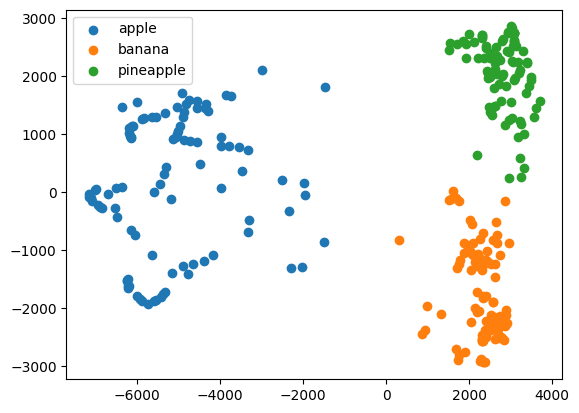

In [40]:
for label in range(0, 3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:, 0], data[:, 1])

plt.legend(['apple', 'banana', 'pineapple'])
plt.show()